In [67]:
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import date, datetime, timedelta
import os
from newsapi.newsapi_client import NewsApiClient
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot.pandas

In [68]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [125]:
# Set the tickers
tickers = ["AAPL", "AMZN", "GOOGL", "NFLX"]

# Set timeframe to '1D'
timeframe = '1D'

# Get current date and the date from one year ago
current_date = date.today()
past_date = date.today() - timedelta(weeks=52)

df = pd.DataFrame()

# Get historical data
for tick in tickers:
    tmp_df = api.get_barset(
        tick,
        timeframe,
        limit=365,
        start=current_date,
        end=past_date,
        after=None,
        until=None,
    ).df
    tmp_df = tmp_df.droplevel(0, axis=1)
    tmp_df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
    tmp_df.rename({'close': tick}, axis=1, inplace=True)
    df = pd.concat([df, tmp_df], axis=1)

df.head()

,AAPL,AMZN,GOOGL,NFLX
time,,,,
2019-01-16 00:00:00-05:00,154.9100,1681.9703,1088.210,350.7639
2019-01-17 00:00:00-05:00,155.5300,1691.3700,1098.150,353.8200
2019-01-18 00:00:00-05:00,156.5700,1693.2421,1105.400,338.9200
2019-01-22 00:00:00-05:00,152.9300,1628.3980,1074.540,324.5401
2019-01-23 00:00:00-05:00,153.6799,1636.5500,1082.815,321.5900


In [70]:
aapl_df = df.loc[:, 'AAPL'].to_frame()
aapl_df.rename(columns={'AAPL': 'close'}, inplace=True)
aapl_df['lag_1_day'] = aapl_df['close'].shift()
aapl_df.dropna(inplace=True)

amzn_df = df.loc[:, 'AMZN'].to_frame()
amzn_df.rename(columns={'AMZN': 'close'}, inplace=True)
amzn_df['lag_1_day'] = amzn_df['close'].shift()
amzn_df.dropna(inplace=True)

googl_df = df.loc[:, 'GOOGL'].to_frame()
googl_df.rename(columns={'GOOGL': 'close'}, inplace=True)
googl_df['lag_1_day'] = googl_df['close'].shift()
googl_df.dropna(inplace=True)

nflx_df = df.loc[:, 'NFLX'].to_frame()
nflx_df.rename(columns={'NFLX': 'close'}, inplace=True)
nflx_df['lag_1_day'] = nflx_df['close'].shift()
nflx_df.dropna(inplace=True)

In [71]:
aapl_df.close.hvplot(subplots=True, figsize=(12,8))

:Curve   [time]   (close)

In [72]:
amzn_df.close.hvplot(subplots=True, figsize=(12,8))

:Curve   [time]   (close)

In [73]:
googl_df.close.hvplot(subplots=True, figsize=(12,8))

:Curve   [time]   (close)

In [74]:
nflx_df.close.hvplot(subplots=True, figsize=(12,8))

:Curve   [time]   (close)

In [75]:
aapl_df["return"] = aapl_df["close"].pct_change()
aapl_df.dropna(inplace=True)

In [76]:
amzn_df["return"] = amzn_df["close"].pct_change()
amzn_df.dropna(inplace=True)

In [77]:
googl_df["return"] = googl_df["close"].pct_change()
googl_df.dropna(inplace=True)

In [78]:
nflx_df["return"] = nflx_df["close"].pct_change()
nflx_df.dropna(inplace=True)

In [79]:
short_window = 20
long_window = 100

# Exponentially weighted moving average
aapl_df["short_window_ma"] = aapl_df["close"].ewm(halflife=short_window).mean()
aapl_df["long_window_ma"] = aapl_df["close"].ewm(halflife=long_window).mean()

# Expoentially weighted volatility
aapl_df["fast_vol"] = aapl_df["return"].ewm(halflife=short_window).std()
aapl_df["slow_vol"] = aapl_df["return"].ewm(halflife=long_window).std()

In [80]:
short_window = 20
long_window = 100

# Exponentially weighted moving average
amzn_df["short_window_ma"] = amzn_df["close"].ewm(halflife=short_window).mean()
amzn_df["long_window_ma"] = amzn_df["close"].ewm(halflife=long_window).mean()

# Expoentially weighted volatility
amzn_df["fast_vol"] = amzn_df["return"].ewm(halflife=short_window).std()
amzn_df["slow_vol"] = amzn_df["return"].ewm(halflife=long_window).std()

In [81]:
short_window = 20
long_window = 100

# Exponentially weighted moving average
googl_df["short_window_ma"] = googl_df["close"].ewm(halflife=short_window).mean()
googl_df["long_window_ma"] = googl_df["close"].ewm(halflife=long_window).mean()

# Expoentially weighted volatility
googl_df["fast_vol"] = googl_df["return"].ewm(halflife=short_window).std()
googl_df["slow_vol"] = googl_df["return"].ewm(halflife=long_window).std()

In [82]:
short_window = 20
long_window = 100

# Exponentially weighted moving average
nflx_df["short_window_ma"] = nflx_df["close"].ewm(halflife=short_window).mean()
nflx_df["long_window_ma"] = nflx_df["close"].ewm(halflife=long_window).mean()

# Expoentially weighted volatility
nflx_df["fast_vol"] = nflx_df["return"].ewm(halflife=short_window).std()
nflx_df["slow_vol"] = nflx_df["return"].ewm(halflife=long_window).std()

In [83]:
aapl_df.dropna(inplace=True)
amzn_df.dropna(inplace=True)
googl_df.dropna(inplace=True)
nflx_df.dropna(inplace=True)

In [84]:
aapl_df_copy = aapl_df.copy()
amzn_df_copy = aapl_df.copy()
googl_df_copy = aapl_df.copy()
nflx_df_copy = aapl_df.copy()

In [85]:
X_aapl = aapl_df.drop(columns=['lag_1_day'])
y_aapl = aapl_df.lag_1_day.values.reshape(-1, 1)

X_amzn = amzn_df.drop(columns=['lag_1_day'])
y_amzn = amzn_df.lag_1_day.values.reshape(-1, 1)

X_googl = googl_df.drop(columns=['lag_1_day'])
y_googl = googl_df.lag_1_day.values.reshape(-1, 1)

X_nflx = nflx_df.drop(columns=['lag_1_day'])
y_nflx = nflx_df.lag_1_day.values.reshape(-1, 1)

In [86]:
from sklearn.model_selection import train_test_split

X_aapl_train, X_aapl_test, y_aapl_train, y_aapl_test = train_test_split(X_aapl, y_aapl, random_state=0, test_size=0.20)

X_amzn_train, X_amzn_test, y_amzn_train, y_amzn_test = train_test_split(X_amzn, y_amzn, random_state=0, test_size=0.20)

X_googl_train, X_googl_test, y_googl_train, y_googl_test = train_test_split(X_googl, y_googl, random_state=0, test_size=0.20)

X_nflx_train, X_nflx_test, y_nflx_train, y_nflx_test = train_test_split(X_nflx, y_nflx, random_state=0, test_size=0.20)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [88]:
X_aapl_train_scaled, X_aapl_test_scaled = scaler.fit_transform(X_aapl_train), scaler.transform(X_aapl_test)

X_amzn_train_scaled, X_amzn_test_scaled = scaler.fit_transform(X_amzn_train), scaler.transform(X_amzn_test)

X_googl_train_scaled, X_googl_test_scaled = scaler.fit_transform(X_googl_train), scaler.transform(X_googl_test)

X_nflx_train_scaled, X_nflx_test_scaled = scaler.fit_transform(X_nflx_train), scaler.transform(X_nflx_test)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_aapl = GradientBoostingRegressor(random_state=0)

gbr_amzn = GradientBoostingRegressor(random_state=0)

gbr_googl = GradientBoostingRegressor(random_state=0)

gbr_nflx = GradientBoostingRegressor(random_state=0)

In [90]:
gbr_aapl.fit(X_aapl_train_scaled, y_aapl_train)

gbr_amzn.fit(X_amzn_train_scaled, y_amzn_train)

gbr_googl.fit(X_googl_train_scaled, y_googl_train)

gbr_nflx.fit(X_nflx_train_scaled, y_nflx_train)

/opt/anaconda3/envs/Viz/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/Viz/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/Viz/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/Viz/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

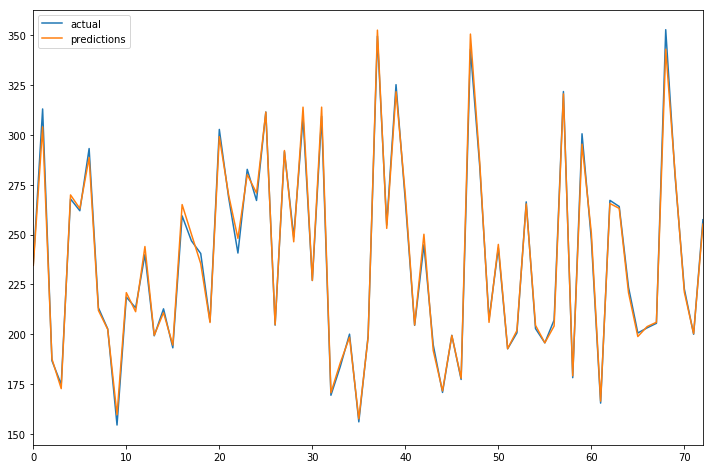

In [91]:
aapl_GBR_predictions = gbr_aapl.predict(X_aapl_test_scaled)

aapl_GBR_predictions_df = pd.DataFrame({'actual': np.ravel(y_aapl_test), 'predictions': aapl_GBR_predictions})

aapl_GBR_predictions_df.plot(figsize=(12,8))

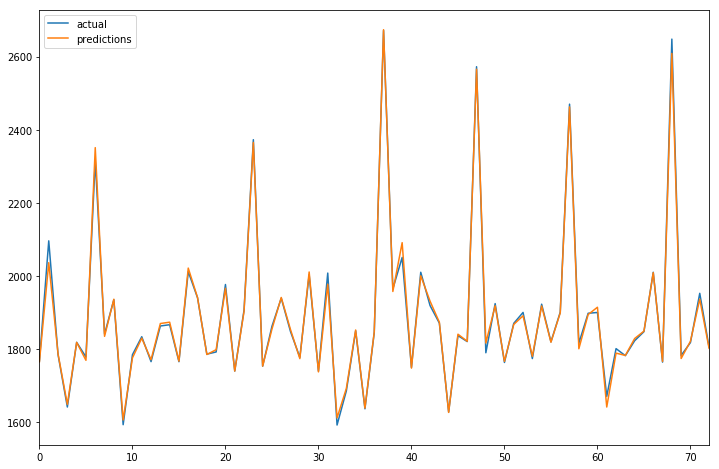

In [92]:
amzn_GBR_predictions = gbr_amzn.predict(X_amzn_test_scaled)

amzn_GBR_predictions_df = pd.DataFrame({'actual': np.ravel(y_amzn_test), 'predictions': amzn_GBR_predictions})

amzn_GBR_predictions_df.plot(figsize=(12,8))

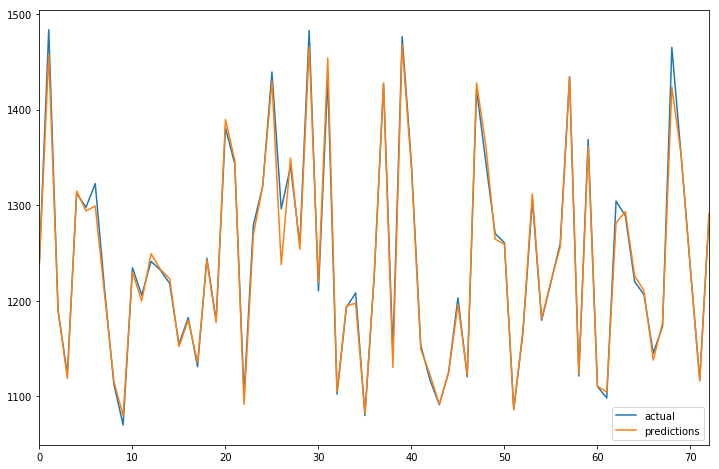

In [93]:
googl_GBR_predictions = gbr_googl.predict(X_googl_test_scaled)

googl_GBR_predictions_df = pd.DataFrame({'actual': np.ravel(y_googl_test), 'predictions': googl_GBR_predictions})

googl_GBR_predictions_df.plot(figsize=(12,8))


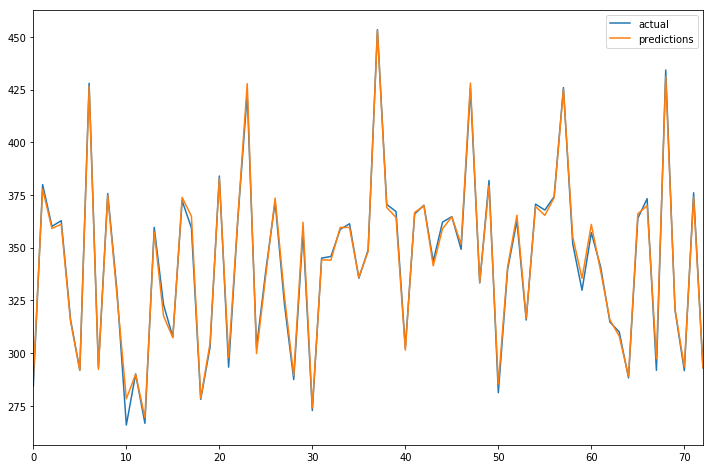

In [94]:
nflx_GBR_predictions = gbr_nflx.predict(X_nflx_test_scaled)

nflx_GBR_predictions_df = pd.DataFrame({'actual': np.ravel(y_nflx_test), 'predictions': nflx_GBR_predictions})

nflx_GBR_predictions_df.plot(figsize=(12,8))

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
aapl_GBR_MSE = mean_squared_error(y_aapl_test, aapl_GBR_predictions)

print(f"AAPL GBR MSE: {aapl_GBR_MSE}")

AAPL GBR MSE: 9.697454822674809


In [97]:
amzn_GBR_MSE = mean_squared_error(y_amzn_test, amzn_GBR_predictions)

print(f"AMZN GBR MSE: {amzn_GBR_MSE}")

AMZN GBR MSE: 186.12479484937649


In [98]:
googl_GBR_MSE = mean_squared_error(y_googl_test, googl_GBR_predictions)

print(f"GOOGL GBR MSE: {googl_GBR_MSE}")

GOOGL GBR MSE: 135.18209236240472


In [99]:
nflx_GBR_MSE = mean_squared_error(y_nflx_test, nflx_GBR_predictions)

print(f"NFLX GBR MSE: {nflx_GBR_MSE}")

NFLX GBR MSE: 7.996148278193892


In [135]:
gbr_aapl.score(X_aapl_test, y_aapl_test)

-6.177575276802874

In [136]:
gbr_amzn.score(X_amzn_test, y_amzn_test)

-15.165371557564793

In [137]:
gbr_googl.score(X_googl_test, y_googl_test)

-6.010515902735294

In [138]:
gbr_nflx.score(X_nflx_test, y_nflx_test)

-7.948542636344408